In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics

In [85]:

from tpot import TPOTRegressor
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

In [28]:
import json
import warnings
import sys
from platform import python_version

In [29]:
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [30]:
%config InlineBackend.figure_format = 'retina' #set 'png' on notebooks

pd.options.mode.chained_assignment = None
seed=101
np.random.seed(seed)

In [31]:
# Versões utilizadas
print('Python version is {}.'.format(python_version()))
print('Scikit-learn version is {}.'.format(sklearn.__version__))

Python version is 3.6.9.
Scikit-learn version is 0.21.3.


In [32]:
# Definindo a classe color para melhoria dos prints
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Dados

In [90]:
postings = pd.read_csv('.\data\stanford\consensus.csv')#, lines=True)

In [315]:
postings.columns

Index(['Unnamed: 0', 'total_postings_11_', 'total_postings_6_10',
       'total_postings_2_5', 'max_Urgency', 'is_Urgency', 'mean_Urgency',
       'total_opinions', 'total_postings', 'cg_c9', 'cg_c8', 'cg_c7', 'cg_c6',
       'cg_l9', 'cg_l8', 'cg_l7', 'cg_l6', 'cg_my', 'cg2_id', 'cg2', 'cg_id',
       'cg', 'cx', 'sp2', 'sp', 'preferences', 'index', 'commentthreadid',
       'Opinion', 'Question', 'Answer', 'Sentiment', 'Confusion', 'Urgency',
       'Text', 'forumpostid', 'CourseType', 'coursedisplayname', 'Vector'],
      dtype='object')

In [134]:
# Bliblioteca necessária 
from sklearn.utils import resample

In [135]:
# Quantidade por classe
postings.is_Urgency.value_counts()

0    24766
1     3917
Name: is_Urgency, dtype: int64

In [136]:
# Separandos as classes majoritária e minoritária
p_majority = postings[postings.is_Urgency==0]
p_minority = postings[postings.is_Urgency==1]
 
# Classe minoritária -  Upsample
p_minority_upsampled = resample(p_minority, 
                                 replace=True,     # reamostragem com substituição
                                 n_samples=24766,   # para corresponder com a classe majoritária
                                 random_state=100) # para reproduzir os mesmos resultados
 
# Combine a classe majoritária com a classe minoritária upsampled
p_upsampled = pd.concat([p_majority, p_minority_upsampled])
 
# Exibir a nova contagem da nova classe
p_upsampled.is_Urgency.value_counts()

1    24766
0    24766
Name: is_Urgency, dtype: int64

In [304]:
p_upsampled

,Unnamed: 0,total_postings_11_,total_postings_6_10,total_postings_2_5,max_Urgency,is_Urgency,mean_Urgency,total_opinions,total_postings,cg_c9,...,Question,Answer,Sentiment,Confusion,Urgency,Text,forumpostid,CourseType,coursedisplayname,Vector
3,3,0,0,0,2.0,0,2.000000,0,1,0.0,...,0,0,5,4,2,"['Thanks', 'It', 'useful', 'think', 'answers',...","5,30483E+23",Humanities,HumanitiesSciences/EP101/Environmental_Physiology,"[-0.1750001609, 0.15370325740000002, -0.219730..."
4,4,1,0,0,6.5,0,2.708333,15,60,0.0,...,1,0,"3,5",4,5,"['Hello', 'Kristin', 'Thank', 'nice', 'usefull...",53e1dfb0fac7aaea13000007,Medicine,Medicine/HRP258/Statistics_in_Medicine,"[-0.21092042330000002, 0.19797407090000002, -0..."
5,5,1,0,0,6.5,0,2.708333,15,60,0.0,...,0,1,"4,5",4,1,"['Sorry', 'senility', 'set', 'Forgot', 'multip...",51cf95c4ae53040e00000001,Medicine,Medicine/HRP258/Statistics_in_Medicine,"[-0.1434068829, -0.20254309480000002, -0.25560..."
6,6,1,0,0,6.5,0,2.708333,15,60,0.0,...,1,0,"4,5",4,5,"['Dear', 'Kristian', 'really', 'interesting', ...",51b81216f359c4120000016a,Medicine,Medicine/HRP258/Statistics_in_Medicine,"[0.16051065920000002, -0.249766022, -0.2170561..."
7,7,1,0,0,6.5,0,2.708333,15,60,0.0,...,0,0,6,4,"2,5","['Hi', 'Kristin', 'really', 'appreciate', 'opp...",51b97e294983c010000000d6,Medicine,Medicine/HRP258/Statistics_in_Medicine,"[-0.0321808197, -0.3111517131, -0.3462259471, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,16339,0,0,1,5.0,1,4.200000,2,5,0.0,...,1,0,"3,5",4,5,"['graded', 'essays', 'still', 'seeing', 'need'...",526e65aa1686e41b3b000014,Medicine,Medicine/SciWrite/Fall2013,"[0.0223475043, -0.12983514370000002, -0.157813..."
23922,24725,0,0,1,5.5,1,4.333333,0,3,0.0,...,1,0,4,"5,5","5,5","['How', 'would', 'determine', 'complexity', 's...",530a96b133395f0cad000044,Humanities,HumanitiesScience/StatLearning/Winter2014,"[-0.08901903030000001, 0.1155854017, -0.187413..."
18163,18884,0,0,1,6.0,1,4.000000,0,3,0.0,...,0,0,4,4,"3,5","['Thank', 'Rich', 'Let', 'us', 'know', 'contin...",52d5873881848d40aa000050,Humanities,HumanitiesSciences/EP101/Environmental_Physiology,"[0.2822560966, 0.0202682819, 0.011920381300000..."
24820,25623,0,0,1,6.0,1,4.000000,0,2,0.0,...,1,0,4,5,6,"['max', 'number', 'tries', 'always', 'even', '...",532216e32576f3f91000002c,Humanities,HumanitiesScience/StatLearning/Winter2014,"[-0.2044965476, 0.035595994400000004, -0.46543..."


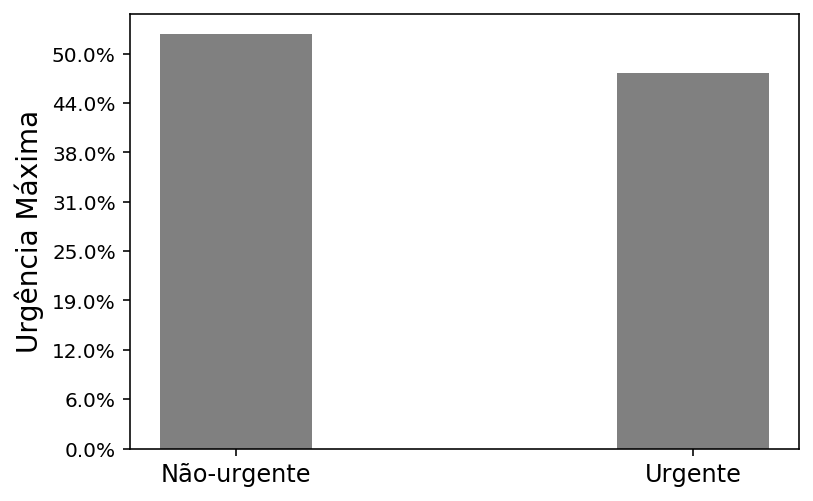

In [311]:
import matplotlib
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    s = str(round(100 * (y/4)))
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
    
formatter = FuncFormatter(to_percent)

x_labels = ['Não-urgente','Urgente']

fig = plt.Figure(figsize=(10,5))


plt.ylabel('Urgência Máxima', fontsize =14)
#plt.xlabel('Opinião', fontsize =14)
plt.xticks([0.125,0.875],x_labels,fontsize=12)
plt.tick_params(labelbottom = 'off')
plt.gca().yaxis.set_major_formatter(formatter)
plt.hist([1 if v else 0 for v in(p_upsampled.loc[p_upsampled['cg'] >= 0.0]['Urgency'].str.replace(',','.',regex=False).astype(np.float) >= 4)], bins = 4, cumulative = False,density=True, color='gray', align='mid')

#plt.show()
plt.savefig('uxc.png')

In [137]:
X_categories = p_upsampled[['total_opinions', 'total_postings_2_5','total_postings_6_10','total_postings_11_','cg_l9','cg_l8','cg_l7','cg_l6']]

In [138]:
X_binaries = p_upsampled[['total_opinions', 'total_postings_2_5','total_postings_6_10','total_postings_11_','cg_c9','cg_c8','cg_c7','cg_c6']]

In [139]:
X_continous = p_upsampled[['total_opinions', 'total_postings','cg']]

In [140]:
y = p_upsampled[['mean_Urgency']]

In [141]:
y_categories = p_upsampled[['is_Urgency']]

In [213]:
X_categories

,total_opinions,total_postings_2_5,total_postings_6_10,total_postings_11_,cg_l9,cg_l8,cg_l7,cg_l6
3,0,0,0,0,0,0,0,0
4,15,0,0,1,0,0,0,0
5,15,0,0,1,0,0,0,0
6,15,0,0,1,0,0,0,0
7,15,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
15895,2,1,0,0,0,0,0,1
23922,0,1,0,0,0,0,0,0
18163,0,1,0,0,0,0,0,0
24820,0,1,0,0,0,0,0,0


In [188]:
X_categories.values[0:5]

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [15,  0,  0,  1,  0,  0,  0,  0],
       [15,  0,  0,  1,  0,  0,  0,  0],
       [15,  0,  0,  1,  0,  0,  0,  0],
       [15,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [44]:
X_binaries.values[0:5]

array([[ 2.,  3.,  0.,  0.,  0.,  1.],
       [ 2.,  3.,  0.,  0.,  0.,  1.],
       [ 2.,  3.,  0.,  0.,  0.,  1.],
       [ 0.,  1., nan, nan, nan, nan],
       [15., 60.,  0.,  0.,  0.,  0.]])

In [81]:
X_continous.values[0:5], y.values[0:5,0]

(array([[ 2.        ,  3.        ,  0.6630881 ],
        [ 2.        ,  3.        ,  0.6630881 ],
        [ 2.        ,  3.        ,  0.6630881 ],
        [ 0.        ,  1.        ,  0.        ],
        [15.        , 60.        ,  0.59245514]]),
 array([4.33333333, 4.33333333, 4.33333333, 2.        , 2.70833333]))

In [82]:

X_train, X_test, y_train, y_test = train_test_split(X_continous.values, y.values[:,0],
                                                    train_size=0.75, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21512, 3), (7171, 3), (21512,), (7171,))

In [143]:

X_train, X_test, y_train, y_test = train_test_split(X_categories.values, y_categories.values[:,0],
                                                    train_size=0.75, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37149, 8), (12383, 8), (37149,), (12383,))

In [101]:

X_train, X_test, y_train, y_test = train_test_split(X_binaries.values, y_categories.values[:,0],
                                                    train_size=0.75, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21512, 8), (7171, 8), (21512,), (7171,))

In [86]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)#, max_time_mins=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_continous_pipeline.py')

Generation 1 - Current best internal CV score: -0.8203836925468557
Generation 2 - Current best internal CV score: -0.8202694812000004
Generation 3 - Current best internal CV score: -0.8202694812000004
Generation 4 - Current best internal CV score: -0.8202694812000004
Generation 5 - Current best internal CV score: -0.8171233147440404

Best pipeline: RandomForestRegressor(KNeighborsRegressor(input_matrix, n_neighbors=22, p=2, weights=distance), bootstrap=False, max_features=0.45, min_samples_leaf=1, min_samples_split=11, n_estimators=100)
-0.860094299063504


In [145]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=90)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_categories_pipeline.py')

Generation 1 - Current best internal CV score: 0.6889284200888193
Generation 2 - Current best internal CV score: 0.6889284200888193
Generation 3 - Current best internal CV score: 0.6889284200888193
Generation 4 - Current best internal CV score: 0.6889284200888193

93.83 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(ZeroCount(input_matrix), bootstrap=False, criterion=gini, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=100)
0.6909472664136316


In [102]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=20)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_categories_pipeline.py')

Imputing missing values in feature set


Generation 1 - Current best internal CV score: 0.8683526855091686
Generation 2 - Current best internal CV score: 0.8683526855091686

20.09 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=7, max_features=0.5, min_samples_leaf=19, min_samples_split=3, n_estimators=100, subsample=0.6500000000000001)
Imputing missing values in feature set
0.8651513038627806


0    24766
1     3917
Name: is_Urgency, dtype: int64

1    24766
0    24766
Name: is_Urgency, dtype: int64

In [148]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from tpot.builtins import ZeroCount

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=None)


In [149]:
exported_pipeline = make_pipeline(
    ZeroCount(),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=100)
)

In [158]:
exported_pipeline.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=0.5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=19, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.6500000000000001,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [159]:
results = exported_pipeline.predict(testing_features)

In [104]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
training_features = imputer.transform(X_train)
testing_features = imputer.transform(X_test)




In [156]:

# Average CV score on the training set was: 0.8683526855091686
exported_pipeline = GradientBoostingClassifier(learning_rate=0.1, max_depth=7, max_features=0.5, min_samples_leaf=19, min_samples_split=3, n_estimators=100, subsample=0.6500000000000001)



In [157]:
exported_pipeline.fit(training_features, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [21512, 37149, 21512]

In [162]:

results = exported_pipeline.predict(X_test)

In [163]:
results[:1000]

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [209]:
# Importando as bibliotecas para as métricas
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, roc_auc_score, recall_score
#from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix, plot_learning_curves
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix, plot_learning_curves


import lime
import lime.lime_tabular

In [170]:
# Métricas
# print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_train,results),2)))
# print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_train,results),2)))
# print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_train,results),2)))
# print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_train,results),2)))
# print(color.BOLD + 'AUC: ' + color.END + str(round(roc_auc_score(y_train,results),2)))


print(color.BOLD + 'Acurácia do modelo: '  + color.END + str(round(accuracy_score(y_test,results),2)))
print(color.BOLD + 'Precision: ' + color.END + str(round(precision_score(y_test,results,average='micro'),2)))
print(color.BOLD + 'F1 do modelo: ' + color.END + str(round(f1_score(y_test,results,average='micro'),2)))
print(color.BOLD + 'Recall do modelo: ' + color.END + str(round(recall_score(y_test,results,average='micro'),2)))
#print(color.BOLD + 'AUC: ' + color.END + str(round(roc_auc_score(y_scores_test,logit_pred_scores,average='micro'),2)))

# Print do relatório de classificação
# cr = classification_report(y_train,results)
# print(color.BOLD + '\nRelatório de Classificação' + color.END)
# print(str(cr))

cr = classification_report(y_test,results)
print(color.BOLD + '\nRelatório de Classificação' + color.END)
print(str(cr))

Acurácia do modelo: 0.69
Precision: 0.69
F1 do modelo: 0.69
Recall do modelo: 0.69

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.72      0.62      0.67      6187
           1       0.67      0.77      0.71      6196

    accuracy                           0.69     12383
   macro avg       0.70      0.69      0.69     12383
weighted avg       0.70      0.69      0.69     12383




Matriz de confusão
[[3807 2380]
 [1447 4749]]


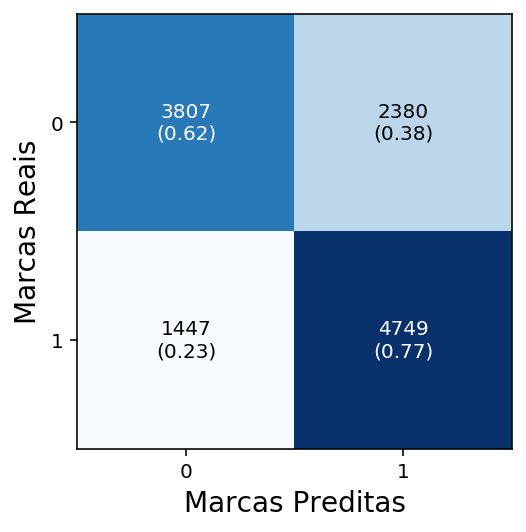

In [269]:
# adicionando resultado na matriz de confusão
cm = confusion_matrix(y_test,results)
print(color.BOLD + '\nMatriz de confusão' + color.END)
print(str(cm))
plot_confusion_matrix(cm, show_normed=True)

plt.xlabel('Marcas Preditas', fontsize =14)
plt.ylabel('Marcas Reais', fontsize =14)

#plt.show()
plt.savefig('matriz_confusao.png')

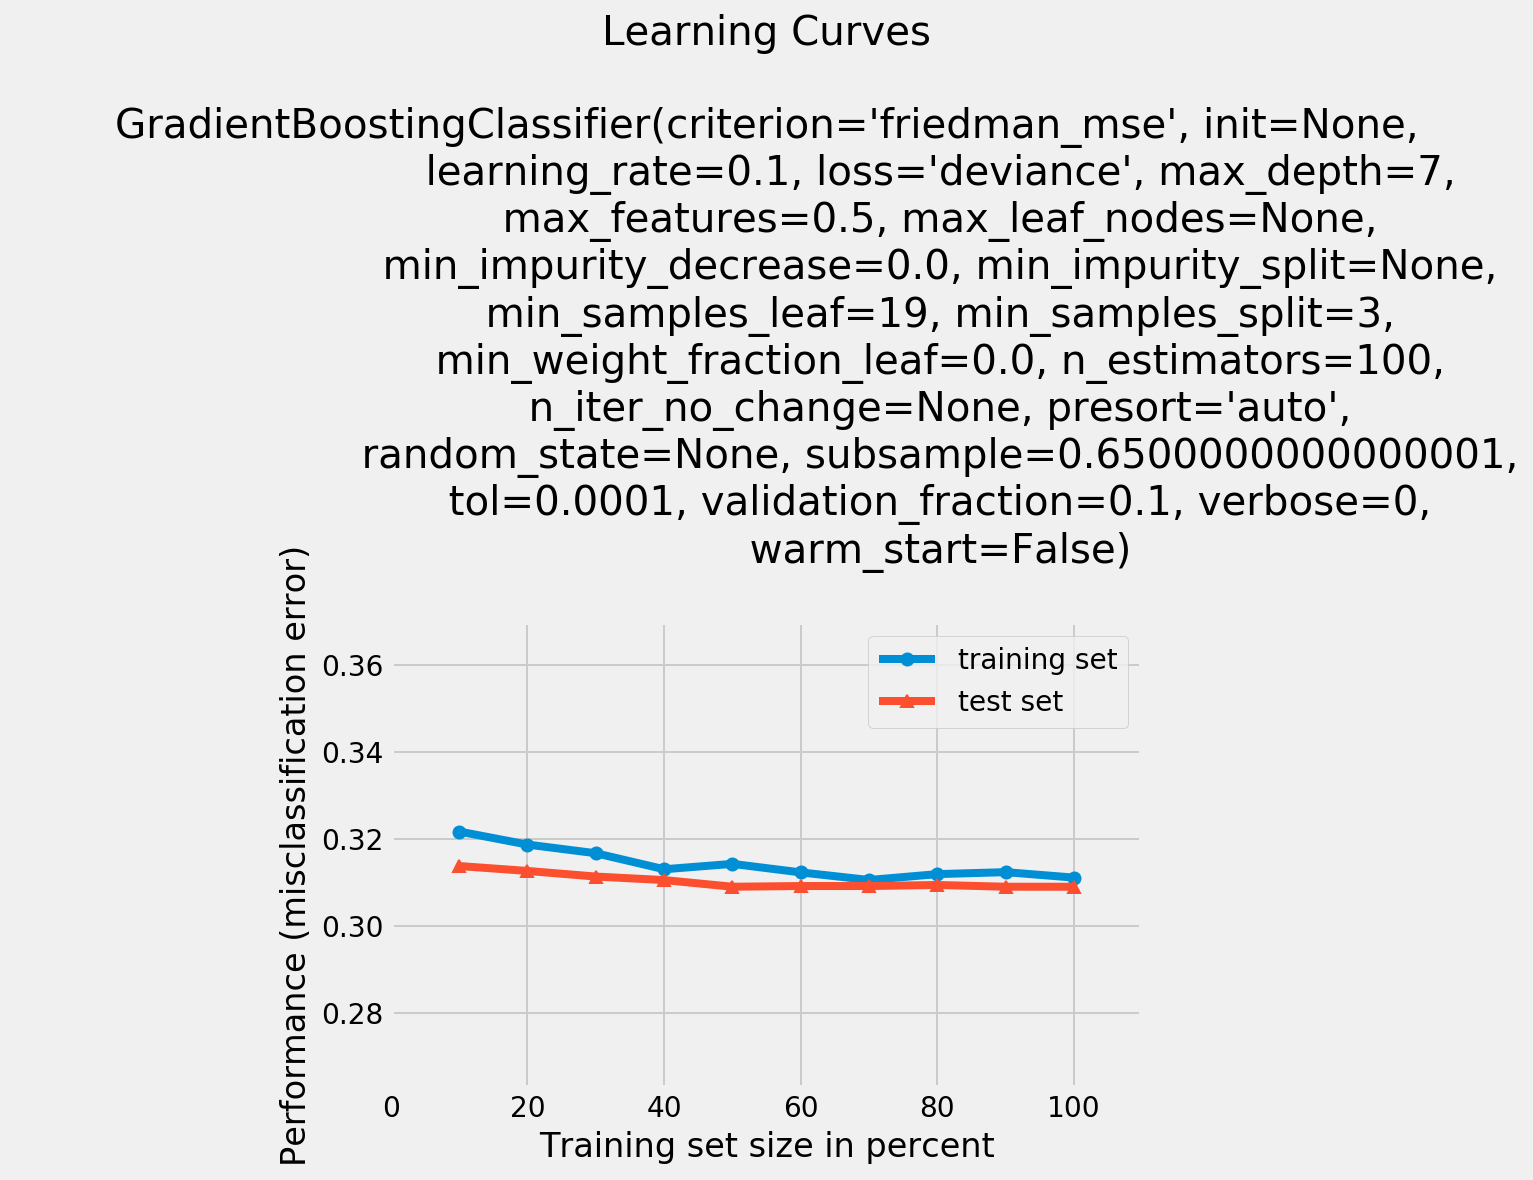

In [174]:
plot_learning_curves(X_train,y_train, X_test, y_test, exported_pipeline)
plt.show()

In [224]:
features = 10
def categorical_features(data,m):
    categorical_names = {}
    categorical_features = range(m)#14
    for feature in categorical_features:
        le = sklearn.preprocessing.LabelEncoder()
        le.fit(data[:, feature])
        data[:, feature] = le.transform(data[:, feature])
        categorical_names[feature] = le.classes_
    return (categorical_names,data)

#X_train_comparisons_train, X_train_comparisons_valid, y_train_comparisons_train, y_train_comparisons_valid

#comparisons_train_categories_2_names, comparisons_train_categories_2 = categorical_features(comparisons_train_cleaned.reset_index(drop=True,inplace=False).drop(['result'], axis=1,inplace=False).values,10)
comparisons_train_categories_2_names, comparisons_train_categories_2 = categorical_features(X_train,8)


In [241]:
X_train[:1]

array([[0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [296]:
categories_names=[range(31),[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]]
X_train_columns=['total_postings_6_10','cg_l9','cg_l7','cg_l6','cg_l9','cg_l8','total_opinions','total_postings_11_']

In [297]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,class_names=['Não Urgente', 'Urgente'], feature_names = X_train_columns,
                                                   categorical_features=range(8), 
                                                   categorical_names=categories_names, kernel_width=3, verbose=False)

In [298]:
predict_fn(X_train[:1])

array([[0.42787386, 0.57212614]])

In [299]:
encoder = sklearn.preprocessing.OneHotEncoder(categorical_features=range(8),sparse=False)
predict_fn = lambda x: exported_pipeline.predict_proba(x)

In [300]:
encoder.fit(comparisons_train_categories_2.astype(float))

c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\tclem\anaconda3\envs\consensus\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


OneHotEncoder(categorical_features=range(0, 8), categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [303]:
i = 6#11
#exp = explainer.explain_instance(packaging.loc[i:i].values[0],#   X_train_comparisons_valid[i], 
#                                 predict_fn, num_features=5)
exp = explainer.explain_instance(X_train[i],#   X_train_comparisons_valid[i], 
                                 predict_fn, num_features=5)
exp.show_in_notebook()
#exp.save_to_file('lime.html')
# fig = exp.as_pyplot_figure()
# plt.title('Explanação Local para a Classe Urgência')

# plt.savefig('lime.png')

In [263]:
exp

In [200]:


preditores=list(X_train)
feat_imp = pd.Series(['total_opinions', 'total_postings_2_5','total_postings_6_10','total_postings_11_','cg_l9','cg_l8','cg_l7','cg_l6'], preditores).sort_values(ascending=False)



In [206]:
feat_imp.index

KeyboardInterrupt: 

TypeError: no numeric data to plot

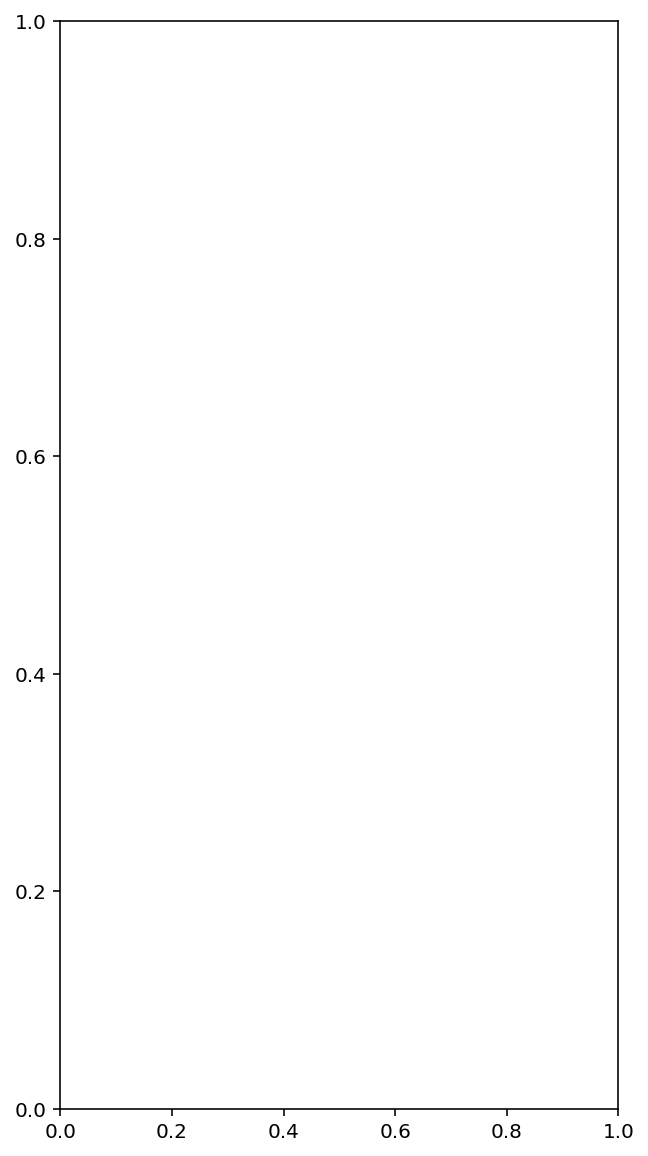

In [198]:
# plot
plt.subplots(figsize=(5, 10))                       
feat_imp.head(20).plot(kind='barh', title='Importância dos Atributos', color='blue')
plt.xlabel('Score')
plt.gca().invert_yaxis()

In [ ]:
# Coeficientes - Logistic Regression
coef_comparisons = pd.DataFrame((exported_pipeline.coef_[0]), index = X_train.columns.values, columns=['Coefficient'])
coef_comparisons = coef_comparisons.sort_values(by='Coefficient', ascending=False)

# Importância dos Atributos
preditores_comparisons=list(X_train)
feat_score_comparisons = abs(exported_pipeline.coef_[0])
feat_imp_comparisons = pd.Series(feat_score_comparisons, preditores_comparisons).sort_values(ascending=False)




#Plot
plt.subplots(figsize=(5, 8))
feat_imp_comparisons.head(10).plot(kind='barh', title='Importância dos Atributos', color='blue')
plt.xlabel('Score')
plt.gca().invert_yaxis()